In [9]:
%matplotlib inline
from mxnet import autograd, nd
import common as comm
from mxnet.gluon import loss as gloss

In [3]:
#读取数据
batch_size = 256
train_iter, test_iter = comm.load_data_fashion_mnist(batch_size)

In [4]:
for features, labels in train_iter:
    print(features.shape, labels.shape)
    break

(256, 1, 28, 28) (256,)


In [15]:
#初始化参数模型
num_inputs = 784
num_hiddens = 256
num_outputs = 10
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)


In [16]:
params = [W1,b1,W2,b2]
for param in params:
    param.attach_grad()

In [17]:
#定义激活函数
def relu(X):
    return nd.maximum(X, 0)

In [18]:
#定义模型
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

In [19]:
#定义损失函数 or 优化器
loss = gloss.SoftmaxCrossEntropyLoss()

In [27]:
#训练模型
num_epochs, lr = 200, 0.5
comm.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.1390, train acc 0.949, test acc 0.894
epoch 2, loss 0.1378, train acc 0.949, test acc 0.896
epoch 3, loss 0.1320, train acc 0.952, test acc 0.897
epoch 4, loss 0.1295, train acc 0.952, test acc 0.899
epoch 5, loss 0.1352, train acc 0.951, test acc 0.901
epoch 6, loss 0.1273, train acc 0.953, test acc 0.899
epoch 7, loss 0.1264, train acc 0.953, test acc 0.898
epoch 8, loss 0.1240, train acc 0.954, test acc 0.897
epoch 9, loss 0.1223, train acc 0.955, test acc 0.899
epoch 10, loss 0.1208, train acc 0.956, test acc 0.901
epoch 11, loss 0.1213, train acc 0.956, test acc 0.901
epoch 12, loss 0.1160, train acc 0.958, test acc 0.897
epoch 13, loss 0.1162, train acc 0.956, test acc 0.899
epoch 14, loss 0.1132, train acc 0.959, test acc 0.898
epoch 15, loss 0.1120, train acc 0.959, test acc 0.899
epoch 16, loss 0.1149, train acc 0.957, test acc 0.900
epoch 17, loss 0.1088, train acc 0.960, test acc 0.901
epoch 18, loss 0.1048, train acc 0.962, test acc 0.899
epoch 19, loss 0.10

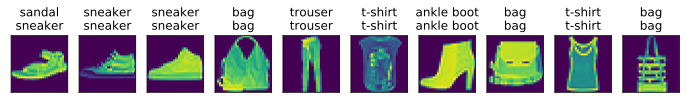

In [31]:
for X, y in test_iter:
    break

true_labels = comm.get_fashion_mnist_labels(y.asnumpy())
pred_labels = comm.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

comm.show_fashion_mnist(X[30:40], titles[30:40])